In [1]:
import os

In [2]:
import rospy


from nav_msgs.msg import OccupancyGrid
from geometry_msgs.msg import Quaternion, Point, Pose, PoseArray, PoseStamped
from sensor_msgs.msg import LaserScan
from std_msgs.msg import Header, String

import numpy as np
from numpy.random import random_sample
import math

from random import randint, random

In [3]:
import pickle


In [4]:
here = OccupancyGrid()

In [5]:
here.info

map_load_time: 
  secs: 0
  nsecs:         0
resolution: 0.0
width: 0
height: 0
origin: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 0.0

In [6]:
ls  = LaserScan()

In [7]:
ls

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
angle_min: 0.0
angle_max: 0.0
angle_increment: 0.0
time_increment: 0.0
scan_time: 0.0
range_min: 0.0
range_max: 0.0
ranges: []
intensities: []

In [8]:
rospy.init_node('sample_node')

In [9]:

with open('sample_scan.pickle', 'rb') as handle:
    scan_obj = pickle.load(handle)

#### Scan object

In [10]:
scan_obj

header: 
  seq: 2585
  stamp: 
    secs: 565
    nsecs: 412000000
  frame_id: "base_scan"
angle_min: 0.0
angle_max: 6.28318977355957
angle_increment: 0.017501922324299812
time_increment: 0.0
scan_time: 0.0
range_min: 0.11999999731779099
range_max: 3.5
ranges: [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1.8665423393249512, 1.8759479522705078, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.4152936935424805, 3.32309627532959, 3.2363381385803223, 3.1565635204315186, 3.093818187713623, 3.0175020694732666, 2.9673850536346436, 2.8892970085144043, 2.8412492275238037, 2.773820400238037, 2.7432262897491455, 2.6889255046844482, 2.622385025024414, 2.5875988006591797, 2.5431551933288574, 2.5118205547332764, 2.4673519134521484, 2.423022747039795, 2.3848490715026855, 2.362212657928467, 2.3474225997924805, 2

# MAP STUFF

In [11]:

with open('sample_grid.pickle', 'rb') as handle:
    grid_obj = pickle.load(handle)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from collections import Counter

In [27]:
grid_obj.info

map_load_time: 
  secs: 0
  nsecs: 797000000
resolution: 0.05000000074505806
width: 384
height: 384
origin: 
  position: 
    x: -10.0
    y: -10.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0

In [28]:
grid_obj

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs: 797000000
  frame_id: "map"
info: 
  map_load_time: 
    secs: 0
    nsecs: 797000000
  resolution: 0.05000000074505806
  width: 384
  height: 384
  origin: 
    position: 
      x: -10.0
      y: -10.0
      z: 0.0
    orientation: 
      x: 0.0
      y: 0.0
      z: 0.0
      w: 1.0
data: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [14]:
arr = grid_obj.data

In [15]:
arr = np.array(arr)

In [16]:
arr=arr.reshape(384, -1)

In [17]:
arr[arr==0]=50

In [18]:
arr.shape

(384, 384)

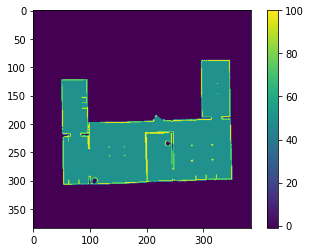

In [19]:
plt.imshow(arr)
plt.colorbar()


In [20]:
Counter(arr.flatten().tolist())

Counter({-1: 106596, 100: 3341, 50: 37519})

In [21]:
p  = PoseStamped()

In [22]:
p

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
pose: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 0.0

In [23]:
p = PoseArray()